In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data=pd.read_excel("C:\Apps/Data_Train.xlsx")

In [3]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data=train_data.copy()

In [11]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])


In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for feature in['Date_of_Journey','Dep_Time','Arrival_Time']:
      change_into_datetime(feature)


In [16]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [18]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [19]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [20]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [21]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [22]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,2019,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 05:50:00,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1


In [23]:
data.drop('Date_of_Journey',axis=1,inplace= True)

In [24]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,2019,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 05:50:00,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1


In [25]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    data.drop(col,axis=1,inplace= True)
    return df.head(2)

In [26]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,2019,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1,5,50


In [27]:
def flight_dep_time(x):
    
    if ( x>4 ) and ( x<=8 ):
        return 'early morning'
    
    elif ( x>8 ) and ( x<=12 ):
        return 'morning'
    
    elif ( x<16 ) and ( x<=20 ):
        return 'evening'
    
    elif ( x<20 ) and ( x<=24 ):
        return 'night'
    else:
        return 'late night'

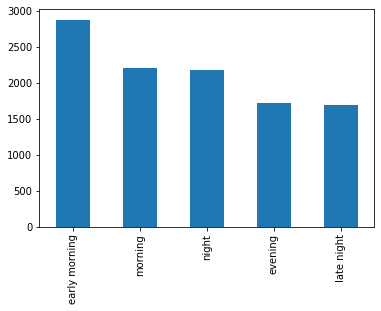

In [28]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [29]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [30]:
cf.go_offline()

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [32]:
data.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,2019,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,2019,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-28 23:30:00,5h 25m,1 stop,No info,6218,5,2019,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-28 21:35:00,4h 45m,1 stop,No info,13302,3,2019,1,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-05-28 11:25:00,2h 25m,non-stop,No info,3873,24,2019,6,9,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,2019,12,18,55
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,2019,1,8,0
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,2019,12,8,55
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-05-28 19:15:00,7h 50m,1 stop,No info,8625,27,2019,5,11,25


In [33]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h ' +x
    elif 'm' not in x:
        x=x+' 0m'
        return x

In [34]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [35]:
data['Duration']

0          None
1          None
2        19h 0m
3          None
4          None
          ...  
10678      None
10679      None
10680     3h 0m
10681      None
10682      None
Name: Duration, Length: 10682, dtype: object

In [145]:
data.head(3)

,Airline,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,NaN,2022-03-22 01:10:00,non-stop,3897.0,24,3,22,20,1,1,1,1,1
1,7,NaN,2022-05-28 13:15:00,2 stops,7662.0,5,1,5,50,0,0,0,0,0
2,10,NaN,2022-06-10 04:25:00,2 stops,13882.0,6,9,9,25,0,0,0,0,0


In [ ]:
data['Duration'].str.replace('h','*60').str.replace('','+').str.replace('m','*l').apply(eval)

In [ ]:
eval('3+454')

In [ ]:
data.head(2)

In [ ]:
sns.lmplot(x='Dep_Time_minute',y='journey_day',data=data)

In [ ]:
data['Destination'].unique()

In [ ]:
data['Destination'].value_counts().plot(kind='pie')

In [37]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [38]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

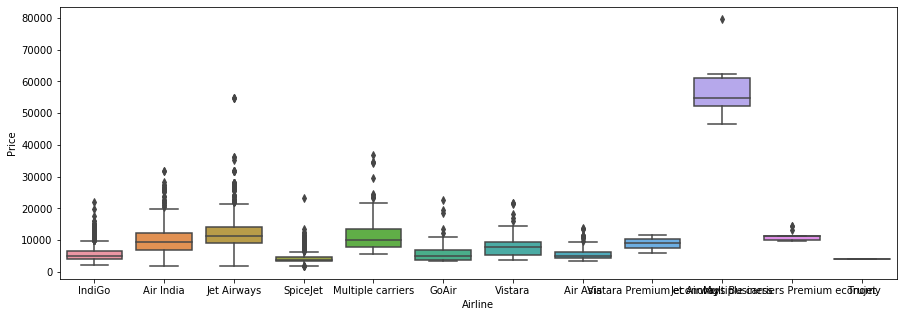

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)


In [40]:
data.head(4)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,None,non-stop,No info,3897,24,2019,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 13:15:00,None,2 stops,No info,7662,5,2019,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,2019,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-28 23:30:00,None,1 stop,No info,6218,5,2019,12,18,5


In [41]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
2 Long layover                   0.01
Red-eye flight                   0.01
1 Short layover                  0.01
Name: Additional_Info, dtype: float64

In [42]:
data.drop(columns=['Additional_Info','Route','Duration','journey_year'],axis=1,inplace=True)

In [43]:
data.head(4)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,2022-03-22 01:10:00,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,2022-05-28 13:15:00,2 stops,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,2022-06-10 04:25:00,2 stops,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,2022-05-28 23:30:00,1 stop,6218,5,12,18,5


In [44]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [45]:
cat_num=[col for col in data.columns if data[col].dtype!='object']

In [46]:
cat_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [47]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [48]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [49]:
data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [51]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

In [52]:
data.head(3)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2022-03-22 01:10:00,non-stop,3897,24,3,22,20,1,1,1,1,1
1,Air India,Kolkata,Banglore,2022-05-28 13:15:00,2 stops,7662,5,1,5,50,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2022-06-10 04:25:00,2 stops,13882,6,9,9,25,0,0,0,0,0


In [59]:
Airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [60]:
Airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [63]:
dict1={key:index for index , key in enumerate (Airlines,0)}

In [64]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [66]:
data['Airline'].map(dict1)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [68]:
data['Airline']=data['Airline'].map(dict1)

In [69]:
data.head(3)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2022-03-22 01:10:00,non-stop,3897,24,3,22,20,1,1,1,1,1
1,7,Kolkata,Banglore,2022-05-28 13:15:00,2 stops,7662,5,1,5,50,0,0,0,0,0
2,10,Delhi,Cochin,2022-06-10 04:25:00,2 stops,13882,6,9,9,25,0,0,0,0,0


In [70]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [72]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [74]:
Destination=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [75]:
Destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [76]:
dict2={key:index for index , key in enumerate (Destination,0)}

In [77]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [80]:
data['Destination']=data['Destination'].map(dict2)

In [82]:
data['Destination']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10678   NaN
10679   NaN
10680   NaN
10681   NaN
10682   NaN
Name: Destination, Length: 10682, dtype: float64

In [81]:
data.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,NaN,2022-03-22 01:10:00,non-stop,3897,24,3,22,20,1,1,1,1,1
1,7,Kolkata,NaN,2022-05-28 13:15:00,2 stops,7662,5,1,5,50,0,0,0,0,0


In [86]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

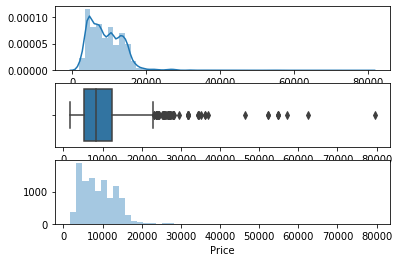

In [87]:
plot(data,'Price')

In [88]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

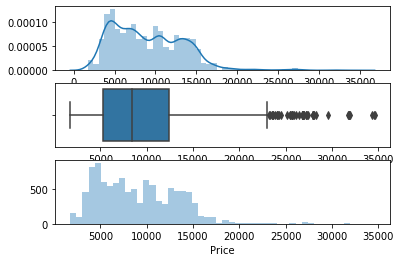

In [89]:
plot(data,'Price')

In [90]:
data.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,NaN,2022-03-22 01:10:00,non-stop,3897.0,24,3,22,20,1,1,1,1,1
1,7,Kolkata,NaN,2022-05-28 13:15:00,2 stops,7662.0,5,1,5,50,0,0,0,0,0


In [92]:
data.drop(columns=['Source'],axis=1,inplace=True)

In [93]:
data.head(2)

,Airline,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,NaN,2022-03-22 01:10:00,non-stop,3897.0,24,3,22,20,1,1,1,1,1
1,7,NaN,2022-05-28 13:15:00,2 stops,7662.0,5,1,5,50,0,0,0,0,0


In [97]:
data.dtypes

Airline                     int64
Destination               float64
Arrival_Time       datetime64[ns]
Total_Stops                object
Price                     float64
journey_day                 int64
journey_month               int64
Dep_Time_hour               int64
Dep_Time_minute             int64
Source_Banglore             int64
Source_Kolkata              int64
Source_Delhi                int64
Source_Chennai              int64
Source_Mumbai               int64
dtype: object

In [98]:
from sklearn.feature_selection import mutual_info_regression

In [113]:
X=data.drop(['Price'],axis=1)

In [114]:
y=data['Price']

In [115]:
X.dtypes

Airline                     int64
Destination               float64
Arrival_Time       datetime64[ns]
Total_Stops                object
journey_day                 int64
journey_month               int64
Dep_Time_hour               int64
Dep_Time_minute             int64
Source_Banglore             int64
Source_Kolkata              int64
Source_Delhi                int64
Source_Chennai              int64
Source_Mumbai               int64
dtype: object

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
reg_rf=RandomForestRegressor

In [150]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])